# 逻辑斯蒂回归
## 1 简介-使用 sigmoid 函数计算概率
许多问题需要概率估计作为输出。逻辑回归是一种极其有效的概率计算机制。实际上，您可以通过以下两种方式使用返回的概率：
1. “按原样”应用。例如，如果垃圾邮件预测模型将电子邮件作为输入并输出值为 0.932，则这意味着该电子邮件为垃圾邮件的概率为 93.2%。
2. 转换为二元类别，例如“真”或“假”、“垃圾邮件”或“非垃圾邮件”。
这个笔记重点在第一个输出方式
### 1.1 Sigmoid 函数
您可能想知道逻辑回归模型如何确保其输出代表概率，始终输出 0 到 1 之间的值。碰巧，有一系列称为逻辑函数的函数，其输出具有相同的特征。标准 Logistic 函数，也称为 sigmoid 函数（sigmoid 的意思是“S 形”），其公式为：
$$f(x) = \frac{1}{1+e^{-x}}$$


<function matplotlib.pyplot.show(close=None, block=None)>

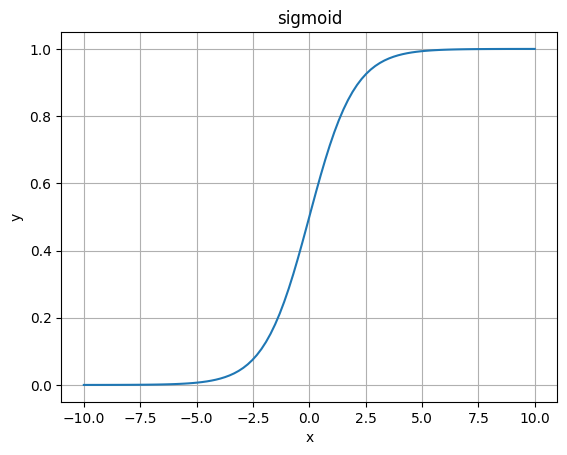

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show

### 1.2 使用sigmoid转换线性输出
下面是逻辑斯蒂回归的线性部分
$$z = b +w_1x_1 + w_2x_2 + w_3x_3 + ... + w_Nx_N$$
接下来是转换
$$y'=\frac{1}{1+e^{-z}}$$

## 2 损失和正则化
逻辑回归模型使用与线性回归模型相同的过程进行训练，有两个主要区别：
1. 逻辑回归模型使用[**对数损失**](###-2.1-Log-Loss)作为损失函数，而不是平方损失。 
2. 应用**正则化**对于防止过度拟合至关重要。

### 2.1 Log Loss
在线性回归模型中，您使用平方损失（也称为 L2 损失）作为损失函数。平方损失非常适合输出值变化率恒定的线性模型。
然而，逻辑回归模型的变化率并不是恒定的。正如您在计算概率中所看到的，S 型曲线是 S 形的而不是线性的。当对数赔率 ( 𝑧 ) 值越接近 0，则小幅增加 𝑧 导致更大的变化 𝑦 比当 𝑧 是一个大的正数或负数。而且要求精度很高
如果您使用平方损失来计算 sigmoid 函数的误差，随着输出越来越接近 0 和 1，您将需要更多内存来保留跟踪这些值所需的精度。相反，逻辑回归的损失函数是对数损失。对数损失方程返回变化幅度的对数，而不仅仅是数据到预测的距离。对数损失计算如下：
$$Log Loss=\Sigma_{(x,y)}-ylog(y')-(1-y)log(1-y')$$